In [284]:
'''
Heart Disease prediction by Shiming Shen

dataset source: https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data

The dataset contains 14 different attributes from 13 heart disease measurement index and one result attribute, 
and this dataset is built for presence of heart disease in the patients.
I am trying to categorize the disease and non-disease. Also, I would predict the 
Stage of heart disease by high correlated variables.

List of Attributes:

1. age: continuous
2. sex: categorical, 2 values {0: female, 1: male}
3. cp (chest pain type): categorical, 4 values
    {1: typical angina, 2: atypical angina, 3: non-angina, 4: asymptomatic angina}
4. restbp (resting blood pressure on admission to hospital): continuous (mmHg)
5. chol (serum cholesterol level): continuous (mg/dl)
6. fbs (fasting blood sugar): categorical, 2 values {0: <= 120 mg/dl, 1: > 120 mg/dl}
7. restecg (resting electrocardiography): categorical, 3 values
    {0: normal, 1: ST-T wave abnormality, 2: left ventricular hypertrophy}
8. thalach (maximum heart rate achieved): continuous
9. exang (exercise induced angina): categorical, 2 values {0: no, 1: yes}
10. oldpeak (ST depression induced by exercise relative to rest): continuous
11. slope (slope of peak exercise ST segment): categorical, 3 values 
    {1: upsloping, 2: flat, 3: downsloping}
12. ca (number of major vessels colored by fluoroscopy): discrete (0,1,2,3)
13. thal: categorical, 3 values {3: normal, 6: fixed defect, 7: reversible defect}
14. num (diagnosis of heart disease): categorical, 5 values 
    {0: less than 50% narrowing in any major vessel, 
    1-4: more than 50% narrowing in 1-4 vessels}
    
In this assignment, I would like to present the facts of this certain dataset including distribution comparison
and descriptive analysis. Then, I would set up the logisitics regression analysis for the dataset in figuring out
the variables would lead to the final correct diagnosis.
'''

'\nHeart Disease prediction by Shiming Shen\n\ndataset source: https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data\n\nThe dataset contains 14 different attributes from 13 heart disease measurement index and one result attribute, \nand this dataset is built for presence of heart disease in the patients.\nI am trying to categorize the disease and non-disease. Also, I would predict the \nStage of heart disease by high correlated variables.\n\nList of Attributes:\n\n1. age: continuous\n2. sex: categorical, 2 values {0: female, 1: male}\n3. cp (chest pain type): categorical, 4 values\n    {1: typical angina, 2: atypical angina, 3: non-angina, 4: asymptomatic angina}\n4. restbp (resting blood pressure on admission to hospital): continuous (mmHg)\n5. chol (serum cholesterol level): continuous (mg/dl)\n6. fbs (fasting blood sugar): categorical, 2 values {0: <= 120 mg/dl, 1: > 120 mg/dl}\n7. restecg (resting electrocardiography): categorical, 3 value

In [285]:
#Import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from pprint import pprint

import seaborn as sns
from pandas import DataFrame,Series
from sklearn import linear_model
import os

In [286]:
#Load Dataset
columns = ["age", "sex", "cp", "trestbps", "chol","fbs", "restecg", 
           "thalach","exang", "oldpeak","slope", "ca", "thal", "num"]
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data", 
                  header = None, 
                  names = columns)
dfa = df.convert_objects(convert_numeric=True)
dfa.head(10)

/Users/shimingshen/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  import sys


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
5,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0
6,62.0,0.0,4.0,140.0,268.0,0.0,2.0,160.0,0.0,3.6,3.0,2.0,3.0,3
7,57.0,0.0,4.0,120.0,354.0,0.0,0.0,163.0,1.0,0.6,1.0,0.0,3.0,0
8,63.0,1.0,4.0,130.0,254.0,0.0,2.0,147.0,0.0,1.4,2.0,1.0,7.0,2
9,53.0,1.0,4.0,140.0,203.0,1.0,2.0,155.0,1.0,3.1,3.0,0.0,7.0,1


In [287]:
#Data cleaning Process
dfa.info()

df1 = dfa.dropna()
df1.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null float64
sex         303 non-null float64
cp          303 non-null float64
trestbps    303 non-null float64
chol        303 non-null float64
fbs         303 non-null float64
restecg     303 non-null float64
thalach     303 non-null float64
exang       303 non-null float64
oldpeak     303 non-null float64
slope       303 non-null float64
ca          299 non-null float64
thal        301 non-null float64
num         303 non-null int64
dtypes: float64(13), int64(1)
memory usage: 33.2 KB


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


/Users/shimingshen/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/shimingshen/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/shimingshen/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/shimingshen/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/shimi

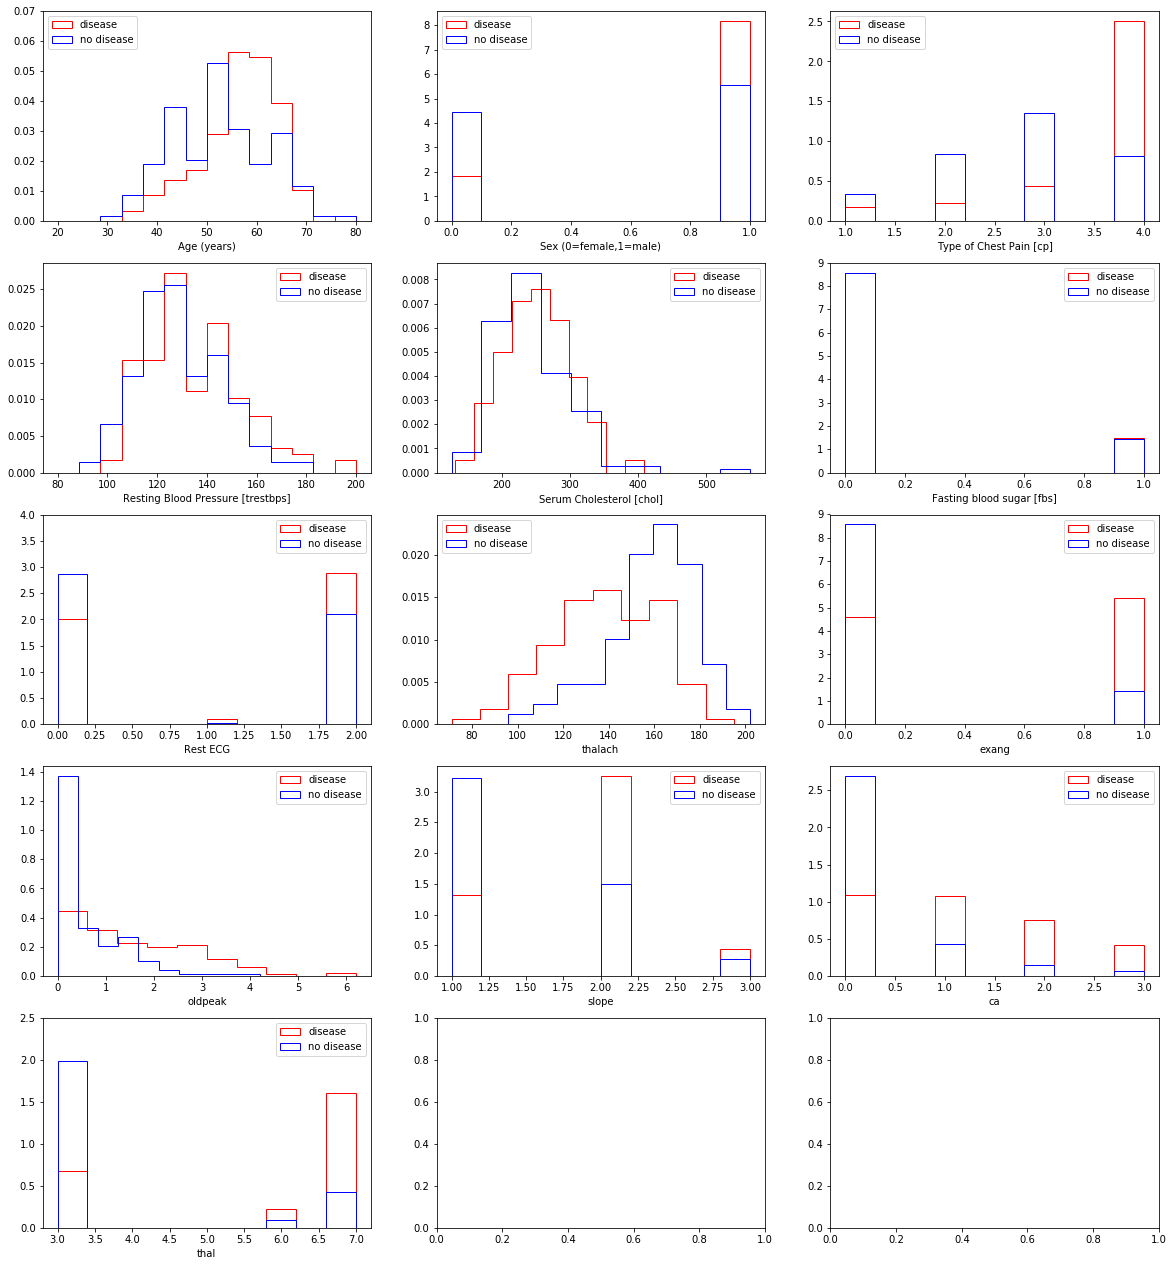

In [288]:
# Distributions compared for disease and non-disease
fig, axes = plt.subplots( nrows=5, ncols=3, figsize=(20,20) )
plt.subplots_adjust( wspace=0.20, hspace=0.20, top=0.97 )

bins = np.linspace(20, 80, 15)
axes[0,0].hist(df1[df1.num>0].age.tolist(),bins,color=["red"],histtype="step",label="disease",normed=True)
axes[0,0].hist(df1[df1.num==0].age,bins,color=["blue"],histtype="step",label="non-disease",normed=True)
axes[0,0].set_xlabel("Age (years)")
axes[0,0].set_ylim(0.0,0.070)
axes[0,0].legend(prop={'size': 10},loc="upper left")

axes[0,1].hist(df1[df1.num>0].sex.tolist(),color=["red"],histtype="step",label="disease",normed=True)
axes[0,1].hist(df1[df1.num==0].sex,color=["blue"],histtype="step",label="non-disease",normed=True)
axes[0,1].set_xlabel("Sex (0=female,1=male)")
axes[0,1].legend(prop={'size': 10},loc="upper left")

axes[0,2].hist(df1[df1.num>0].cp.tolist(),color=["red"],histtype="step",label="disease",normed=True)
axes[0,2].hist(df1[df1.num==0].cp,color=["blue"],histtype="step",label="non-disease",normed=True)
axes[0,2].set_xlabel("Type of Chest Pain [cp]")
axes[0,2].legend(prop={'size': 10},loc="upper left")

bins = np.linspace(80, 200, 15)
axes[1,0].hist(df1[df1.num>0].trestbps.tolist(),bins,color=["red"],histtype="step",label="disease",normed=True)
axes[1,0].hist(df1[df1.num==0].trestbps,bins,color=["blue"],histtype="step",label="non-disease",normed=True)
axes[1,0].set_xlabel("Resting Blood Pressure [trestbps]")
axes[1,0].legend(prop={'size': 10},loc="upper right")

axes[1,1].hist(df1[df1.num>0].chol.tolist(),color=["red"],histtype="step",label="disease",normed=True)
axes[1,1].hist(df1[df1.num==0].chol,color=["blue"],histtype="step",label="non-disease",normed=True)
axes[1,1].set_xlabel("Serum Cholesterol [chol]")
axes[1,1].legend(prop={'size': 10},loc="upper right")

axes[1,2].hist(df1[df1.num>0].fbs.tolist(),color=["red"],histtype="step",label="disease",normed=True)
axes[1,2].hist(df1[df1.num==0].fbs,color=["blue"],histtype="step",label="non-disease",normed=True)
axes[1,2].set_xlabel("Fasting blood sugar [fbs]")
axes[1,2].legend(prop={'size': 10},loc="upper right")

axes[2,0].hist(df1[df1.num>0].restecg.tolist(),color=["red"],histtype="step",label="disease",normed=True)
axes[2,0].hist(df1[df1.num==0].restecg,color=["blue"],histtype="step",label="non-disease",normed=True)
axes[2,0].set_xlabel("Rest ECG")
axes[2,0].set_ylim(0.0,4.0)
axes[2,0].legend(prop={'size': 10},loc="upper right")

axes[2,1].hist(df1[df1.num>0].thalach.tolist(),color=["red"],histtype="step",label="disease",normed=True)
axes[2,1].hist(df1[df1.num==0].thalach,color=["blue"],histtype="step",label="non-disease",normed=True)
axes[2,1].set_xlabel("thalach")
axes[2,1].legend(prop={'size': 10},loc="upper left")

axes[2,2].hist(df1[df1.num>0].exang.tolist(),color=["red"],histtype="step",label="disease",normed=True)
axes[2,2].hist(df1[df1.num==0].exang,color=["blue"],histtype="step",label="non-disease",normed=True)
axes[2,2].set_xlabel("exang")
axes[2,2].legend(prop={'size': 10},loc="upper right")

axes[3,0].hist(df1[df1.num>0].oldpeak.tolist(),color=["red"],histtype="step",label="disease",normed=True)
axes[3,0].hist(df1[df1.num==0].oldpeak,color=["blue"],histtype="step",label="non-disease",normed=True)
axes[3,0].set_xlabel("oldpeak")
axes[3,0].legend(prop={'size': 10},loc="upper right")

axes[3,1].hist(df1[df1.num>0].slope.tolist(),color=["red"],histtype="step",label="disease",normed=True)
axes[3,1].hist(df1[df1.num==0].slope,color=["blue"],histtype="step",label="non-disease",normed=True)
axes[3,1].set_xlabel("slope")
axes[3,1].legend(prop={'size': 10},loc="upper right")

axes[3,2].hist(df1[df1.num>0].ca.tolist(),color=["red"],histtype="step",label="disease",normed=True)
axes[3,2].hist(df1[df1.num==0].ca,color=["blue"],histtype="step",label="non-disease",normed=True)
axes[3,2].set_xlabel("ca")
axes[3,2].legend(prop={'size': 10},loc="upper right")

axes[4,0].hist(df1[df1.num>0].thal.tolist(),color=["red"],histtype="step",label="disease",normed=True)
axes[4,0].hist(df1[df1.num==0].thal,color=["blue"],histtype="step",label="non-disease",normed=True)
axes[4,0].set_xlabel("thal")
axes[4,0].set_ylim(0.0,2.5)
axes[4,0].legend(prop={'size': 10},loc="upper right")
plt.show()

In [289]:
#Descriptive Statistics Summary
df1.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,3.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,1.602694,0.676768,4.730640,0.946128
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,1.938629,1.234551
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


<class 'pandas.core.frame.DataFrame'>
Int64Index: 297 entries, 0 to 301
Data columns (total 15 columns):
age         297 non-null float64
sex         297 non-null float64
cp          297 non-null float64
trestbps    297 non-null float64
chol        297 non-null float64
fbs         297 non-null float64
restecg     297 non-null float64
thalach     297 non-null float64
exang       297 non-null float64
oldpeak     297 non-null float64
slope       297 non-null float64
ca          297 non-null float64
thal        297 non-null float64
num         297 non-null int64
num2        297 non-null int64
dtypes: float64(13), int64(2)
memory usage: 47.1 KB


/Users/shimingshen/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


0    160
1    137
Name: num2, dtype: int64

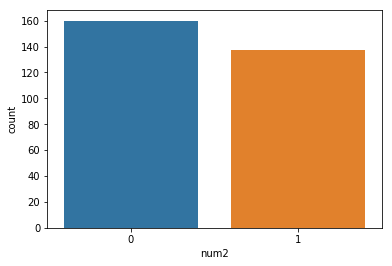

In [300]:
#Let us convert 'Disease' and 'Non-Disease' to 0 and 1 respectively so it will be easier for distingish
df1['num2']=np.where(df1['num']==0,0,1)
df1.head()

#Frequency Comparison between 'Disease' & 'Non-Disease'
sns.countplot(df1['num2'])
df1.info()
df1['num2'].value_counts()

In [292]:
#Logistics Regression setup
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm

X = df1[df1.columns[0:13]]
#df1[0:13] = df1[0:13].apply(pd.to_numeric， errors='ignore')
y = df1['num2'].values
logit_model=sm.Logit(y,X)

#logit_model=sm.Logit(y,df[[0:13]])
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.356234
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  297
Model:                          Logit   Df Residuals:                      284
Method:                           MLE   Df Model:                           12
Date:                Mon, 02 Jul 2018   Pseudo R-squ.:                  0.4838
Time:                        13:58:00   Log-Likelihood:                -105.80
converged:                       True   LL-Null:                       -204.97
                                        LLR p-value:                 7.166e-36
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
age           -0.0454      0.020     -2.223      0.026      -0.085      -0.005
sex            0.9617      0.

In [ ]:
'''
Interpretation:
The coefficient means that when holding the other coefficients consistent, the result, which is
log-odds value on the dependent variable would be increased if the coefficient is positive. The log-odds value
means the probability of the dependent variable. Therefore, the larger the coefficient on the independent variable,
the higher probability a person would get the heart disease.

Conclusion:
From the distribution graphs, we can see that the major group is concentrated in age between 50-65. However, it is
very interesting to see that the coefficient of age is negative. This means the larger the age, the less risk would
happen on the heart disease. So we should set up another model to consider the age effects on heart disease.
Furthermore, based on the interpretation, we three major variable we should focus on is ca (number of major vessels 
colored by fluoroscopy), sex and exang (exercise induced angina) for the further analysis.

Reference:
https://github.com/LucDemortier/HeartDiseaseStudy/blob/master/HeartDiseaseProject.ipynb
'''